# Apresentação

O projeto a seguir visa tratar, prever e exibir dados sobre o valor de habitações. Para isso, foi feito:
* Tratamento de valores nulos, considerando as colunas vizinhas para preencher valores;
* Modelo de previsão, buscando prever o preço médio das habitações a partir das colunas de maior relação com ela;
* Dashboard interativo, visando apresentar os dados de forma eficaz e agradável;
* Fornecer Insights a partir das informações apresentadas no Dashboard.

O dataset utilizado é real e provém do census de 1990 da California, sendo disponibilizado no Kaggle pelo usuário camnugent. O link para acesso é: https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

# Análise Exploratória

Análise detalhada
com identificação
completa de padrões,
outliers e tendências,
interpretação crítica.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
df_housing = pd.read_csv('housing.csv')

In [61]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
df_housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [63]:
print('Número de Colunas: ', df_housing.shape[1])
print('Número de Linhas: ', df_housing.shape[0])

Número de Colunas:  10
Número de Linhas:  20640


In [64]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [65]:
def mostrar_nulls(dataset):
    for column in dataset:
        print(f'{column}: ', dataset[column].isnull().sum())

mostrar_nulls(df_housing)

longitude:  0
latitude:  0
housing_median_age:  0
total_rooms:  0
total_bedrooms:  207
population:  0
households:  0
median_income:  0
median_house_value:  0
ocean_proximity:  0


In [66]:
''' 
def mostrar_negativos(dataset):
    for column in dataset:
        if column < 0:
            print(column)

mostrar_negativos(df_housing)
'''

' \ndef mostrar_negativos(dataset):\n    for column in dataset:\n        if column < 0:\n            print(column)\n\nmostrar_negativos(df_housing)\n'

In [67]:
print('Número de Linhas Duplicadas: ', df_housing.duplicated().sum())

Número de Linhas Duplicadas:  0


# Tratamento

## Corrijindo Valores de Median Income

In [68]:
df_housing['median_income'] = df_housing['median_income'] * 10000
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


## Tratamento de Valores Nulos

Acima, é possível verificar que a coluna 'total_bedrooms' é a única que possui valores nulos. Por se tratar do número de quartos em residências, não há lógica em deixar esse campo nulo, pois mesmo que improvável de não haver quartos em alguma casa, essa informação deveria ser apresentada como 0 para ser devidamente considerada na construção de gráficos.

Por conta disso, tais dados foram preenchidos e, visando uma maior acurácia, buscou-se utilizar as colunas adjacentes para preencher os valores faltantes, buscando padrões que determinassem o valor da coluna. Para alcançar esse objetivo, foi utilizada o módulo KNNImputer da biblioteca scikit-learn, que faz essa lógica automaticamente, permitindo especificar o número de vizinhos da coluna que devem ser considerados no preenchimento.

In [69]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
df_temp = df_housing.copy()
df_housing['ocean_proximity'] = label_encoder.fit_transform(df_housing['ocean_proximity'])

In [70]:
nulls = df_housing.loc[(df_housing['total_bedrooms'].isna() == True)]
nulls

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,43750.0,161900.0,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,16196.0,85100.0,3
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,25762.0,173400.0,3
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,49489.0,247100.0,3
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,39063.0,178400.0,3
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,33409.0,220500.0,4
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,16953.0,167400.0,4
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,51033.0,410700.0,0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,66073.0,258100.0,0


In [71]:
from sklearn.impute import KNNImputer 

impute_knn = KNNImputer(n_neighbors=6) #Rever Número de Vizinhos 
array_inputed = impute_knn.fit_transform(df_housing)

df_housing = pd.DataFrame(array_inputed, columns=df_housing.columns)    

In [72]:
nulls = df_housing.loc[(df_housing['total_bedrooms'].isna() == True)]
nulls

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [73]:
print(df_housing.iloc[290])

longitude               -122.16
latitude                  37.77
housing_median_age        47.00
total_rooms             1256.00
total_bedrooms           309.50
population               570.00
households               218.00
median_income          43750.00
median_house_value    161900.00
ocean_proximity            3.00
Name: 290, dtype: float64


In [74]:
print(mostrar_nulls(df_housing))

longitude:  0
latitude:  0
housing_median_age:  0
total_rooms:  0
total_bedrooms:  0
population:  0
households:  0
median_income:  0
median_house_value:  0
ocean_proximity:  0
None


In [75]:
df_housing.to_csv('sem_nulos.csv')
#Testado no arquivo data_treatment_null_test.py. Passou no teste.

## Removendo Outliers

Removendo o primeiro e o último quartil, garantindo que não hajam outliers no valor mediano das casas.

In [76]:
df_housing['original_order'] = df_housing.index
df_housing = df_housing.sort_values(by=['median_house_value'])

In [77]:
Q1 = df_housing.quantile(0.25)
Q3 = df_housing.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_housing[~((df_housing < (Q1 - 1.5 * IQR)) | (df_housing > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
df_no_outliers = df_no_outliers.sort_values('original_order').drop(columns='original_order')
df_housing = df_housing.sort_values('original_order').drop(columns='original_order')

# Relação entre variáveis dependentes e independentes

In [79]:
'''
= df_housing.loc[
    (df_housing['median_house_value'] > left_limit) & 
    (df_housing['median_house_value'] < right_limit)
    ]
'''

"\n= df_housing.loc[\n    (df_housing['median_house_value'] > left_limit) & \n    (df_housing['median_house_value'] < right_limit)\n    ]\n"

In [80]:
def get_relacoes(dataset, modelo):
    return dataset.corr(modelo)

In [81]:
relacoes = get_relacoes(df_no_outliers, 'pearson')

<Axes: >

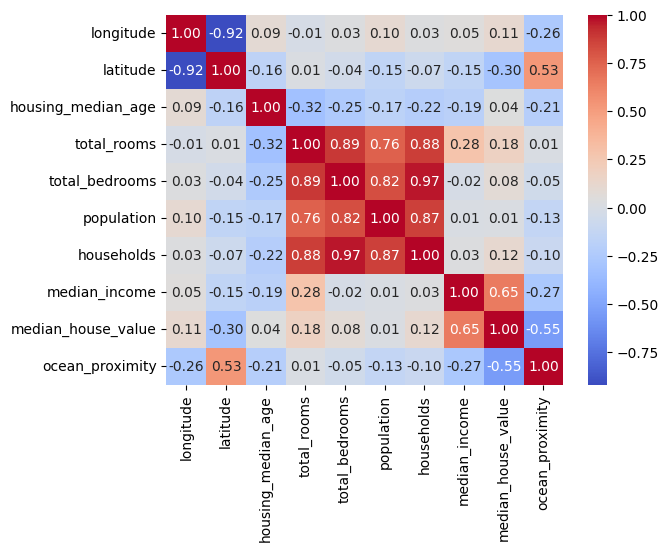

In [82]:
sns.heatmap(relacoes, annot=True, cmap='coolwarm', fmt='.2f')

# Modelos de regressão linear

## Usando Regressão Linear para prever o valor das casas

In [83]:
y = df_no_outliers['median_house_value']
x = df_no_outliers[['median_income', 'ocean_proximity', 'latitude', 'total_rooms', 'households', 'longitude', 'housing_median_age']]

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
model.coef_

array([ 3.46437366e+00, -4.62944705e+04, -1.45910851e+04, -6.02383611e+00,
        6.08320104e+01, -1.56597740e+04,  5.31520393e+02])

In [87]:
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Erro de Média Absoluta: ', mean_absolute_error(y_test, y_pred))
print('Erro de Média Quadrada: ', mean_squared_error(y_test, y_pred))
print('Nota R2: ', r2_score(y_test, y_pred))

Erro de Média Absoluta:  41135.803032980366
Erro de Média Quadrada:  3173243961.248168
Nota R2:  0.6064894595039674


In [89]:
model.score(X_train, y_train)

0.5801068089968713

In [90]:
model.score(X_test, y_test)

0.6064894595039674

### Prevendo Valores

In [91]:
data = {
    'longitude': [-122.23, -122.22, -122.24, -122.25, -122.25],
    'latitude': [37.88, 37.86, 37.85, 37.85, 37.85],
    'housing_median_age': [41.0, 21.0, 52.0, 52.0, 52.0],
    'total_rooms': [880.0, 7099.0, 1467.0, 1274.0, 1627.0],
    'total_bedrooms': [129.0, 1106.0, 190.0, 235.0, 280.0],
    'population': [322.0, 2401.0, 496.0, 558.0, 565.0],
    'households': [126.0, 1138.0, 177.0, 219.0, 259.0],
    'median_income': [8.3252, 8.3014, 7.2574, 5.6431, 3.8462],
    'ocean_proximity': [3, 2, 3, 1, 1],
}

#data = df_housing.head().copy()
#data.drop('median_house_population', axis=1)

df_predict = pd.DataFrame(data)
df_predict = df_predict.drop(['population', 'total_bedrooms'], axis=1)
df_predict = df_predict[['median_income', 'ocean_proximity', 'latitude', 'total_rooms', 'households', 'longitude', 'housing_median_age']]

predicted_values = model.predict(df_predict)
df_predict["predicted_median_house_value"] = predicted_values.round(2)

In [92]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,3.0


In [93]:
df_predict.head()

,median_income,ocean_proximity,latitude,total_rooms,households,longitude,housing_median_age,predicted_median_house_value
0,8.3252,3,37.88,880.0,126.0,-122.23,41.0,-57116.66
1,8.3014,2,37.86,7099.0,1138.0,-122.22,21.0,2782.30
2,7.2574,3,37.85,1467.0,177.0,-122.24,52.0,-51112.86
3,5.6431,1,37.85,1274.0,219.0,-122.25,52.0,45344.63
4,3.8462,1,37.85,1627.0,259.0,-122.25,52.0,45645.27


## Usando Regressão Linear para prever o valor das populações

In [94]:
y = df_no_outliers['population']
x = df_no_outliers[['households', 'total_bedrooms', 'total_rooms']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Erro de Média Absoluta: ', mean_absolute_error(y_test, y_pred))
print('Erro de Média Quadrada: ', mean_squared_error(y_test, y_pred))
print('Nota R2: ', r2_score(y_test, y_pred))

Erro de Média Absoluta:  217.66472011077508
Erro de Média Quadrada:  87323.65359818493
Nota R2:  0.7682029107652091


In [99]:
model.score(X_train, y_train)

0.7610514289414452

In [100]:
model.score(X_test, y_test)

0.7682029107652091

### Prevendo Valores

In [101]:
data_dois = {
    'longitude': [-122.23, -122.22, -122.24, -122.25, -122.25],
    'latitude': [37.88, 37.86, 37.85, 37.85, 37.85],
    'housing_median_age': [41.0, 21.0, 52.0, 52.0, 52.0],
    'total_rooms': [880.0, 7099.0, 1467.0, 1274.0, 1627.0],
    'total_bedrooms': [129.0, 1106.0, 190.0, 235.0, 280.0],
    'households': [126.0, 1138.0, 177.0, 219.0, 259.0],
    'median_income': [8.3252, 8.3014, 7.2574, 5.6431, 3.8462],
    'median_house_value': [452600.0, 358500.0, 352100.0, 341300.0, 342200.0],
    'ocean_proximity': [1,1,1,2,1]
}

df_predict_dois = pd.DataFrame(data_dois)
df_predict_dois = df_predict_dois.drop(['median_income', 'median_house_value', 'ocean_proximity', 'longitude', 'latitude'], axis=1)
df_predict_dois = df_predict_dois[['households', 'total_bedrooms', 'total_rooms']]

predicted_values_dois = model.predict(df_predict_dois)
df_predict_dois["population"] = predicted_values_dois.round(2)


In [102]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,3.0


In [103]:
df_predict_dois.head()

,households,total_bedrooms,total_rooms,population
0,126.0,129.0,880.0,486.26
1,1138.0,1106.0,7099.0,3187.39
2,177.0,190.0,1467.0,617.30
3,219.0,235.0,1274.0,721.45
4,259.0,280.0,1627.0,825.00


# Intervalos de Confiança 

In [104]:
import math

In [105]:
media = df_no_outliers['median_house_value'].mean()
media

175306.59123600504

In [106]:
Z = 1.96

In [107]:
std = df_no_outliers['median_house_value'].std()
print(std)

89032.04905563028


In [108]:
n = len(df_no_outliers['median_house_value'][:1000])
print(n)

1000


In [109]:
left_limit = media - (Z * (std / math.sqrt(n)))
print(left_limit)

169788.3276645594


In [110]:
right_limit = media + (Z * (std / math.sqrt(n)))
print(right_limit)

180824.8548074507


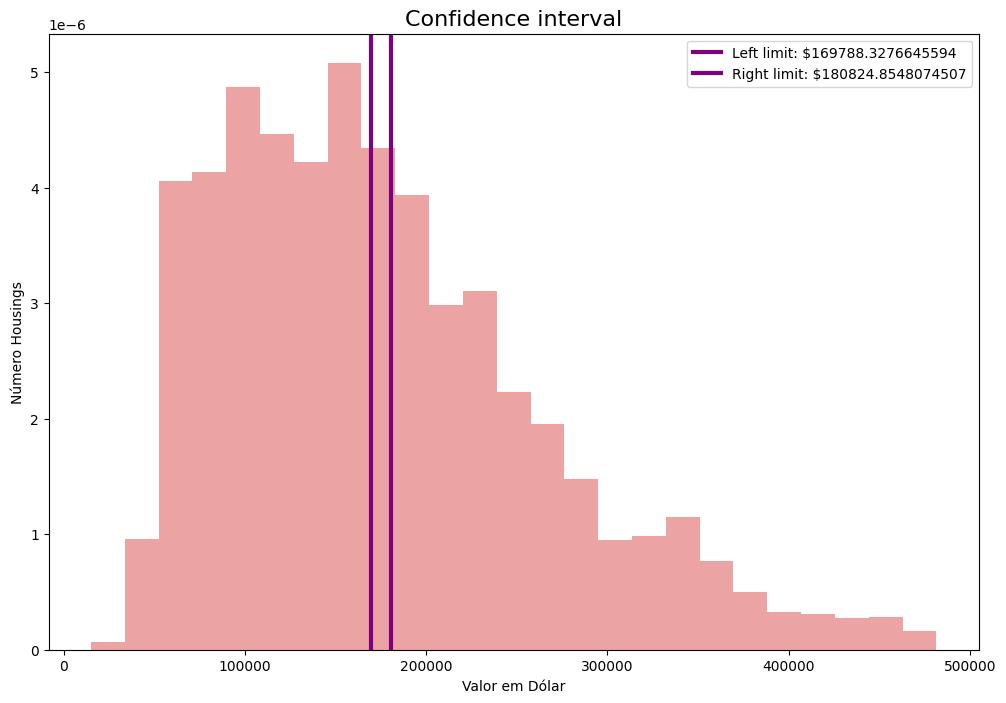

In [111]:
plt.figure(figsize=(12,8))
plt.hist(df_no_outliers['median_house_value'], bins=25, density=True, alpha=0.6, color='#e06666')

plt.axvline(left_limit, color='purple',lw=3, label=f'Left limit: ${left_limit}')
plt.axvline(right_limit, color='purple',lw=3, label=f'Right limit: ${right_limit}')

plt.xlabel('Valor em Dólar')
plt.ylabel('Número Housings')
plt.title('Confidence interval', fontsize=16)
plt.legend()

plt.show()

In [112]:
df_no_outliers.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,60574.0,431000.0,0.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,46458.0,217000.0,0.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,46146.0,247600.0,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,57192.0,283500.0,0.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,36832.0,216900.0,0.0


# Extra

In [113]:
df_housing['ocean_proximity'].value_counts()

ocean_proximity
0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
Name: count, dtype: int64

In [114]:
def reverter_ocean_proximity(dataset):
    for index, row in dataset.iterrows():
        if row['ocean_proximity'] == 0:
            dataset.at[index, 'ocean_proximity'] = 'OCEAN'
        elif row['ocean_proximity'] == 1:
            dataset.at[index, 'ocean_proximity'] = 'INLAND'
        elif row['ocean_proximity'] == 2:
            dataset.at[index, 'ocean_proximity'] = 'NEAR OCEAN'
        elif row['ocean_proximity'] == 3:
            dataset.at[index, 'ocean_proximity'] = 'NEAR BAY'
        elif row['ocean_proximity'] == 4:
            dataset.at[index, 'ocean_proximity'] = 'ISLAND'

reverter_ocean_proximity(df_housing)
reverter_ocean_proximity(df_no_outliers)
reverter_ocean_proximity(df_predict)

C:\Users\Enzo\AppData\Local\Temp\ipykernel_17724\3757684791.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEAR BAY' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.at[index, 'ocean_proximity'] = 'NEAR BAY'
C:\Users\Enzo\AppData\Local\Temp\ipykernel_17724\3757684791.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'OCEAN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.at[index, 'ocean_proximity'] = 'OCEAN'
C:\Users\Enzo\AppData\Local\Temp\ipykernel_17724\3757684791.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEAR BAY' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.at[index, 

In [115]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


In [116]:
df_no_outliers.to_csv('df_housing_clean.csv')
#Testado no arquivo data_treatment_null_test.py. Passou no teste.